In [ ]:
! wget https://raw.githubusercontent.com/Russkova/diplom/main/data_preprocessing.py -O data_preprocessing.py
! wget https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/scaledsvd.py -O scaledsvd.py

! pip install lightfm
!apt-get install libsuitesparse-dev
!pip install scikit-sparse
! wget https://raw.githubusercontent.com/Russkova/diplom/main/hybrids.py -O hybrids.py

--2024-05-23 01:02:55--  https://raw.githubusercontent.com/Russkova/diplom/main/data_preprocessing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11288 (11K) [text/plain]
Saving to: ‘data_preprocessing.py’

data_preprocessing. 100%[===================>]  11.02K  --.-KB/s    in 0s      

2024-05-23 01:02:56 (74.6 MB/s) - ‘data_preprocessing.py’ saved [11288/11288]

--2024-05-23 01:02:56--  https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/scaledsvd.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1507 (1.5K) [

In [ ]:
! pip install --upgrade git+https://github.com/Russkova/polara@main#egg=polara


  Cloning https://github.com/Russkova/polara (to revision main) to /tmp/pip-install-3rfhx5iv/polara_17201d8fa95048d7a047251f752a80f3
  Running command git clone --filter=blob:none --quiet https://github.com/Russkova/polara /tmp/pip-install-3rfhx5iv/polara_17201d8fa95048d7a047251f752a80f3
  Resolved https://github.com/Russkova/polara to commit f42942bef0c2c2c0b344c9e93164e2e799e7176c
  Preparing metadata (setup.py) ... done
  Created wheel for polara: filename=polara-0.7.2-py3-none-any.whl size=86271 sha256=43ec83b97094924176319392ada471ad02cf31cbe725f1f4ce6f8d78fd6895fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-8nsjeeyr/wheels/ce/05/37/5a9c8c1d28b55ab27441755eac459c8dae32bcf6592950c761
Successfully built polara


In [ ]:
! pip install ipypb
! wget https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/data/meta_info_ml1m.csv -O meta_info_ml1m.csv
! wget https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/utils.py -O utils.py
!apt-get install libsuitesparse-dev
!pip install scikit-sparse
! wget https://github.com/Russkova/diplom/raw/main/ml-1m.zip -O ml-1m.zip

--2024-05-22 21:21:03--  https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/data/meta_info_ml1m.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432261 (422K) [text/plain]
Saving to: ‘meta_info_ml1m.csv’

meta_info_ml1m.csv  100%[===================>] 422.13K  --.-KB/s    in 0.02s   

2024-05-22 21:21:03 (22.8 MB/s) - ‘meta_info_ml1m.csv’ saved [432261/432261]

--2024-05-22 21:21:03--  https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3773 (

In [ ]:
import numpy as np
import pandas as pd
from ipypb import track

from polara.evaluation import evaluation_engine as ee
from polara.evaluation.pipelines import find_optimal_svd_rank, evaluate_models
from polara import (SVDModel,
                    PopularityModel,
                    RandomModel)
from polara.recommender.hybrid.models import SimilarityAggregation
from polara.recommender.coldstart.models import (SVDModelItemColdStart,
                                                 RandomModelItemColdStart,
                                                 PopularityModelItemColdStart,
                                                 SimilarityAggregationItemColdStart)

from data_preprocessing import (get_movielens_data,
                                get_bookcrossing_data,
                                get_similarity_data,
                                prepare_data_model,
                                prepare_cold_start_data_model,
                                SimilarityDataModel)
from utils import (report_results, save_results,
                   apply_config, print_data_stats,
                   save_training_time, save_cv_training_time)
%matplotlib inline

In [ ]:
from polara.recommender import defaults
defaults.memory_hard_limit = 5 # allowed memory usage during recommendations generation

In [ ]:
seed = 42

In [ ]:
data_labels = ['ML1M']

In [ ]:
data_labels = ['ML1M']
svd_ranks = {'ML1M': [1, 5, 10, 15, 20, 30, 50, 60, 75, 100, 125, 150, 200, 250, 300,
              350, 400, 500, 750, 1000]}
hybridsvd_weights = [0.1, 0.3, 0.5, 0.7, 0.9]
topk_values = [1, 3, 10, 20, 30]
target_metric = 'mrr'
data_dict = dict.fromkeys(data_labels)
meta_dict = dict.fromkeys(data_labels)
similarities = dict.fromkeys(data_labels)
sim_indices = dict.fromkeys(data_labels)
feature_idx = dict.fromkeys(data_labels)
all_data = [data_dict, similarities, sim_indices, meta_dict]
lbl = 'ML1M'

In [ ]:
from polara import get_movielens_data as get_ml_data
def get_movielens_data(path, fixes_path=None, meta_path=None, implicit=False, filter_data=None, filter_no_meta=False):
    ratings = get_ml_data(path, include_time=True)
    meta_info = None

    if implicit:
        ratings = ratings.query('rating>=4').assign(rating=1)

    if fixes_path is not None:
        id_fix = pd.read_csv(fixes_path)
        fix_col = id_fix.columns[0]
        ratings.movieid.replace(id_fix.set_index(fix_col).movieid, inplace=True)
        ratings = ratings.drop_duplicates()

    if meta_path is not None:
        meta_info = (pd.read_csv(meta_path, sep=';', na_filter=False).set_index('movieid')
                     .reindex(index=ratings['movieid'].unique(), fill_value=[]))
        meta_cols = meta_info.columns
        meta_info.loc[:, meta_cols] = (meta_info.loc[:, meta_cols]
                                       .applymap(lambda x: x.split(',') if x else []))

        if filter_data:
            for field, values in filter_data.items():
                meta_info.loc[:, field] = meta_info[field].apply(lambda x: [v for v in x if v not in values])

        if filter_no_meta:
            not_empty = meta_info.applymap(len).sum(axis=1) > 0
            if not not_empty.all():
                meta_info = meta_info.loc[not_empty]
                ratings = ratings.query(f'movieid in @meta_info.index')
    return ratings, meta_info

In [ ]:
data_dict[lbl], meta_dict[lbl] = get_movielens_data('/content/ml-1m.zip',
                                                    meta_path='/content/meta_info_ml1m.csv',
                                                    implicit=True,
                                                    filter_no_meta=True)

In [ ]:
similarities[lbl], sim_indices[lbl], feature_idx[lbl] = get_similarity_data(meta_dict[lbl])

In [ ]:
data_dict[lbl]

,userid,movieid,rating,timestamp
0,1,1193,1,978300760
3,1,3408,1,978300275
4,1,2355,1,978824291
6,1,1287,1,978302039
7,1,2804,1,978300719
...,...,...,...,...
1000202,6040,1089,1,956704996
1000205,6040,1094,1,956704887
1000206,6040,562,1,956704746
1000207,6040,1096,1,956715648


In [ ]:
data_dict[lbl]
data_dict[lbl] = data_dict[lbl].sort_values(['userid', 'timestamp'], ascending=[True, False])


test = data_dict[lbl].groupby('userid').head(1)


train = data_dict[lbl].drop(test.index)

print('Test dataset:')
print(test)

print('Train dataset:')
print(train)

Test dataset:
         userid  movieid  rating  timestamp
25            1       48       1  978824351
87            2     1544       1  978300174
232           3     2081       1  978298504
235           4     2951       1  978294282
389           5     2029       1  978246555
...         ...      ...     ...        ...
998900     6036     2140       1  956754710
999557     6037      968       1  956801840
999731     6038     1183       1  956717204
999764     6039      912       1  956758029
1000042    6040     1221       1  998315055

[6038 rows x 4 columns]
Train dataset:
         userid  movieid  rating  timestamp
32            1     1566       1  978824330
34            1     1907       1  978824330
4             1     2355       1  978824291
30            1     2294       1  978824291
35            1      783       1  978824291
...         ...      ...     ...        ...
1000007    6040     1961       1  956703977
1000192    6040     2019       1  956703977
999873     6040      5

In [ ]:
train = train.sort_values(['userid', 'timestamp'], ascending=[True, True])
data_dict[lbl] = data_dict[lbl].sort_values(['userid', 'timestamp'], ascending=[True, True])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print_data_stats(data_labels, all_data)

ML1M
{'userid': 6038, 'movieid': 3522}
density 2.699052132255699
similarity matrix density 51.672185638677114


# Standard experiment

In [ ]:

def prepare_data_model_last_rating_hold(data_label, raw_data, similarities, sim_indices, item_meta, seed=0, feedback=None, custom_order='date'):
    userid = 'userid'
    itemid = item_meta[data_label].index.name
    data_model = SimilarityDataModel(similarities[data_label],
                                     sim_indices[data_label],
                                     raw_data[data_label],
                                     userid, itemid,
                                     feedback=feedback,
                                     seed=seed)
    data_model.test_fold = 0
    data_model.test_ratio = 0
    data_model.holdout_size = 1
    data_model._custom_order  = custom_order
    data_model.random_holdout = False
    data_model.warm_start = False
    data_model.verbose = False
    data_model.prepare()
    return data_model

In [ ]:



def fine_tune_svd(model, ranks, label, record_time=False):
    best_svd_rank, svd_scores = find_optimal_svd_rank(model, ranks, target_metric,
                                                      return_scores=True,
                                                      iterator=lambda x: track(x, label=label))
    model_config = {model.method: {'rank': best_svd_rank}}
    model_scores = {model.method: svd_scores}
    try:
        if record_time:
            max_rank = max(ranks)
            save_training_time(f'{experiment_name}_rank_{max_rank}', model, pd.Index([max_rank], name='rank'), label)
    finally:
        return model_config, model_scores

мы делаем грид серч и находим оптимальный ранк по валидации из предпоследнего отзыва


In [ ]:
config = {}
scores = {}
data_models = {}

In [ ]:
data = data_dict['ML1M']

In [ ]:
meta_dict['ML1M']

,cast,director,writer,genres
movieid,,,,
1193,"[Jack Nicholson, Louise Fletcher, Danny DeVito...",[Miloš Forman],[],[Drama]
3408,"[Julia Roberts, Albert Finney, Aaron Eckhart, ...",[Steven Soderbergh],[Susannah Grant],[Drama]
2355,"[Kevin Spacey, Julia Louis-Dreyfus, Hayden Pan...","[John Lasseter, Andrew Stanton]",[],"[Family, Animation]"
1287,"[Charlton Heston, Jack Hawkins, Haya Harareet,...",[William Wyler],[Gore Vidal],"[Adventure, Drama, Action, History]"
2804,"[Melinda Dillon, Darren McGavin, Peter Billing...",[Bob Clark],[],"[Comedy, Family]"
...,...,...,...,...
3607,"[James Garner, Vera Miles, Pat Hingle, Morgan ...",[Bernard McEveety],[Harry Spalding],[Family]
3026,"[Joe B. Barton, Don Barrett, Sherry Leigh, Bil...",[Rick Roessler],[Rick Roessler],[Horror]
2909,[],[Tessa Blake],[],[Documentary]


In [ ]:
data_dict['ML1M'] = train

In [ ]:
all_data[0]['ML1M']

,userid,movieid,rating,timestamp
31,1,3186,1,978300019
22,1,1270,1,978300055
27,1,1721,1,978300055
37,1,1022,1,978300055
36,1,1836,1,978300172
...,...,...,...,...
1000118,6040,457,1,997454349
1000119,6040,3671,1,997454367
999923,6040,232,1,997454398
1000019,6040,2917,1,997454429


In [ ]:
for label in track(data_labels):
    data_models[label] = prepare_data_model_last_rating_hold(label, *all_data, seed, custom_order='timestamp') # мой вариант вписать колонку дат
    config[label], scores[label] = fine_tune_svd(SVDModel(data_models[label]),
                                                 svd_ranks[label],
                                                 label, True)

 [████████████████████████████████████████████████████████████] 1/1 [01:33<01:33, 92.53s/it]

           ML1M [█████████████████████████████████████████████] 20/20 [00:20<00:00, 0.98s/it]

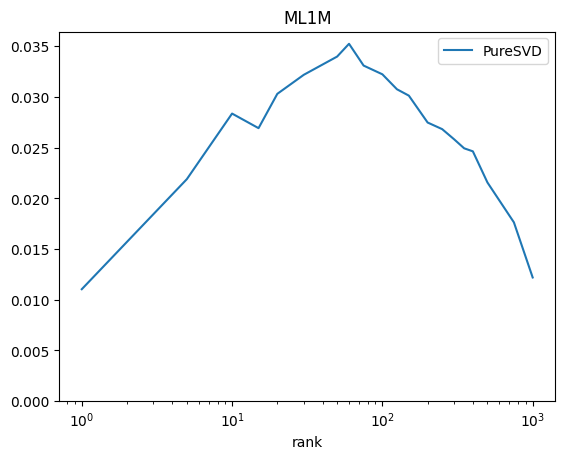

In [ ]:
report_results('rank', scores);

In [ ]:
config

{'ML1M': {'PureSVD': {'rank': 60}}}

## Проверка метрик на последнем отзыве


In [ ]:
data_dict['ML1M'] = data

In [ ]:
all_data[0]['ML1M']

,userid,movieid,rating,timestamp
31,1,3186,1,978300019
22,1,1270,1,978300055
27,1,1721,1,978300055
37,1,1022,1,978300055
36,1,1836,1,978300172
...,...,...,...,...
1000119,6040,3671,1,997454367
999923,6040,232,1,997454398
1000019,6040,2917,1,997454429
999988,6040,1921,1,997454464


In [ ]:
data_last = prepare_data_model_last_rating_hold(label, *all_data, seed, custom_order='timestamp') # мой вариант вписать колонку дат
model_last = SVDModel(data_last)
model_last.rank = 60
model_last.evaluate()

PureSVD model is not ready. Rebuilding.
PureSVD training time: 1.017s


[Relevance(hr=0.0941332449453099),
 Ranking(arhr=0.03317115709392806, mrr=0.03317115709392805),
 Experience(coverage=0.21483375959079284),
 Hits(true_positive=568, false_positive=59772, true_negative=None, false_negative=5466)]